

# **DUO TEAM - HUMPBACKERS**


  - Anannyo Dey
  - Debasmit Roy


---



#**I'm Hard to Spot**
*Sundarban Tiger Pugmark Identification and Count*

![picture](https://www.conservationindia.org/wp-content/files_mf/1299267599pug.jpg)



# **Import And Connectivity With Drive**



In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
import sklearn
from sklearn.ensemble import RandomForestClassifier 
import tensorflow as tf
import tensorflow.keras as tk
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split  
import random
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn.preprocessing import scale
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import NMF
import sklearn.cluster
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
import yellowbrick.cluster
import plotly.express as px
from sklearn import metrics
import sklearn


from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random

from scipy import stats

In [ ]:
!pip3 install numpy Cython
!pip3 install mrmr_selection
!pip install pymrmr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=5c1f9e4321f107ccb156e7699af692965b2175e8c8a0da12d628ab0eea41a665
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp38-cp38-linux_x86_64.whl size=353792 sha256=b6720d846b30fa9f5a032350748c161f8f2396742ac536c5df729f243d1811aa
  Stored i

In [ ]:
import mrmr
from mrmr import mrmr_classif

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Our Plan**
![picture](https://drive.google.com/uc?id=1yPlWt0Qo6d2Lbuz8eiHs7hAoxt9AOKuf)


We use two Feature Selection/Reduction Algorithms Independently
>> 1.  Supervised Minimum redundancy maximum relevance (mRMR) to rank the features
>> 2.  Unsupervised Principal Component Analysis (PCA) to reduce the dimension of features space

We use two types Clustering Algorithms Independently
>> 1.  Custom KMeans Algorithm with an explicit weightage on euclidean distance in Geographical dimentions.
>> 2.  Naive KMeans Algorithm to cluster samples geographically followed by DBSCAN clustering algorithm to form Non-Geographical-feature-based subclusters in each geographical cluster.


1.   **Step 1** 
> We cluster the samples after applying naive k-means(metric='euclid') clustering algorithm taking 2D Geographical feature vector comprising of longitude and latitude. We assign each sample with their respective Geographical Cluster ID.

2.   **Step 2**
> We evaluate the cross correlation in the feature set to detect which features are highly correlated with each other using pearson correlation. We group the correlated features together based on a threshold. We keep the uncorrelated/moderately correlated features as ungrouped. We use this for PCA reduction later in step 4.

3.   **Step 3**
> We use Minimum redundancy maximum relevance feature selection approach to rank NON-GEOGRAPHICAL features. We feed the mRMR ranker function with Hard Coded True Cluster IDs (derived from Data_Description.pdf) and NON-GEOGRAPHICAL features(without any grouping/dim reduction). 

4.   **Step 4**
> We perform Principal Component Analysis on Feature Groups formed in *step 2* individually to reduce dimensions. We form a new feature set using dimension reduced features and ungrouped features. 

5.   **Step 5**
> We apply our Custom K-Means Clustering Algorithm on mRMR selected features formed at Step 3.
6.   **Step 6**
> We apply our Custom K-Means Clustering Algorithm on PCA reduced features formed at Step 4.

7.   **Step 7**
> We apply DBSCAN clustering algorithm on samples from each Geographical Cluster individually using the Non-Geographical features selected at step 3. We use DBSCAN here, because we don't have to pre-specify the number of sub-clusters per Geographical Cluster. We use min_sample and eps as hyperparameters to form DBSCAN subclusters (discussed in respective sectionz later).

8.   **Step 8**
> We aggregate the the numbers of subclusters formed at Step 7 to estimate the total number of possible sub-subclusters i.e. total number of distinct tigers. 


Additionaly, We tried to predict soil type from each geographical regions based lat/lon using Decision Tree Classifer. But, due to lack of training samples from diverse areas of Sundarban, the classification may lead to overfitting. So, we experimented in that section and have not used the results later in our analysis.

**The Notable Conclusions are marked <font color=Red>RED</font> later in this notebook.**


# **Reading From .csv**


*   Firstly, we load the .csv files and stored them in dataframes.
*    Secondly, we scale the values coumnwise between 0 and 1.



In [ ]:
# Reading csv with panda
df = pd.read_csv('/content/drive/MyDrive/tiger/Data/Train.csv')
census_df = pd.read_csv('/content/drive/MyDrive/tiger/Data/Census.csv')

In [ ]:
# Converting dataframe to numpy array
all_data = df.to_numpy()
census_all_data = census_df.to_numpy()

In [ ]:
# To scale the values
all_data[:,4:-2] = all_data[:,4:-2] / np.max(all_data[:,4:-2],axis=0)
census_all_data[:,0:-2] = census_all_data[:,0:-2] / np.max(census_all_data[:,0:-2],axis=0)

# **Unsupervised Way To Cluster Geographical Regions Based On Lat and Long**
We cluster the samples after applying naive k-means(metric='euclid') clustering algorithm taking 2D feature vector comprising of 
1. longitude 
2. latitude. 

On applying clustering algorithm on given data we find- 
*   **Conclusive elbow point at k$≈$8 in train data and**, 

*   **Inconclusive elbow point at k$≈$20 (approx) in test data**.

The samples are projected on realworld interactive map using Plotly.

In [ ]:
lat_long = df[['Lat', 'Long']].to_numpy().astype(float)
census_lat_long = census_df[['Lat', 'Long']].to_numpy().astype(float)

### Train Data

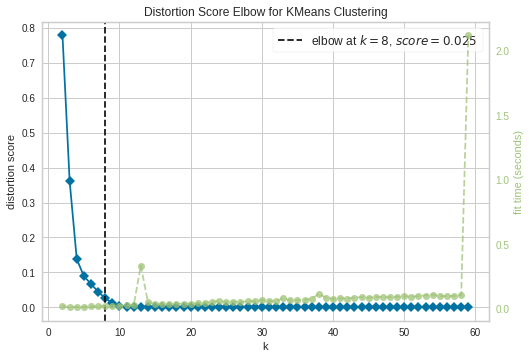

In [ ]:
temp_model = sklearn.cluster.KMeans()
visualizer = KElbowVisualizer(temp_model, k=(2,60), timings= True)
visualizer.fit(lat_long)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [ ]:
# Number of Region Clusters in Train Dataset
NUM_REGION_CLUSTER = 8

In [ ]:
kmean_reg_clustering = sklearn.cluster.KMeans(n_clusters=NUM_REGION_CLUSTER,random_state=0).fit(lat_long)
# Storing Geographical Cluster IDs from train dataset in reg_labels_kmean
reg_labels_kmean = kmean_reg_clustering.labels_
print(list(reg_labels_kmean))

[2, 2, 2, 2, 2, 7, 7, 7, 7, 0, 0, 0, 1, 1, 1, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 7, 7, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5]


In [ ]:
# Ploting Different Geographical Clusters and we use color to distinguish each clusters
fig = px.scatter_mapbox(df[['Lat', 'Long']],
                        lat="Lat", 
                        lon="Long",
                        color = reg_labels_kmean,
                        zoom=10, 
                        height=500,
                        width=500)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

###  Test Data

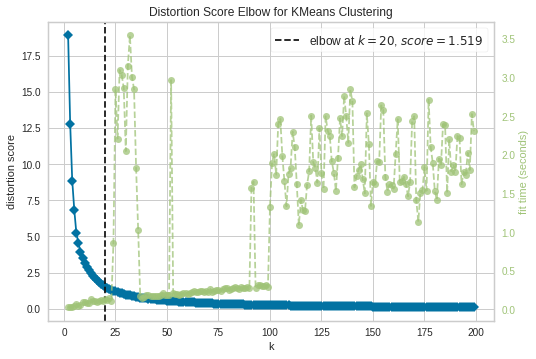

In [ ]:
# Number of Region Clusters in Test Dataset
temp_model = sklearn.cluster.KMeans()
visualizer = KElbowVisualizer(temp_model, k=(2,200), timings= True)
visualizer.fit(census_lat_long)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [ ]:
# Number of Region Clusters in Test Dataset
CENSUS_NUM_REGION_CLUSTER = 20

In [ ]:
census_reg_kmean_clustering = sklearn.cluster.KMeans(n_clusters=CENSUS_NUM_REGION_CLUSTER,random_state=0).fit(census_lat_long)
# Storing Geographical Cluster IDs from test dataset in census_reg_labels_kmean
census_reg_labels_kmean = census_reg_kmean_clustering.labels_
print(list(census_reg_labels_kmean))

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 14, 14, 14, 14, 14, 14, 14, 7, 14, 14, 14, 14, 14, 14, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 14, 14, 14, 14, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 7, 7, 7, 17, 5, 5, 5, 5, 17, 5, 5, 14, 14, 14, 14, 14, 14, 14, 7, 7, 14, 17, 14, 14, 14, 14, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 14, 14, 14, 14, 14, 14, 6, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 17, 17, 17, 14, 14, 14, 14, 14, 17, 17, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 17, 17, 17, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 17, 17, 17, 17, 17, 17, 0, 0, 17, 17, 17, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 17, 12, 19, 19, 17, 17, 12, 12, 12, 12, 3, 3, 12, 12, 9, 9, 3, 12, 12, 12, 12, 12, 12, 12, 1

In [ ]:
# Ploting Different Geographical Clusters and we use color to distinguish each clusters
fig = px.scatter_mapbox(census_df[['Lat', 'Long']], 
                        lat="Lat", 
                        lon="Long",
                        color = census_reg_labels_kmean,
                        zoom=10, 
                        height=500,
                        width=500)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# **Supervised Learning To Predict Soil Type  based On Lat and Long (Not Used, Just For Experiment)**

We tried to predict soil type from each geographical regions based lat/lon using Decision Tree Classifer. But, due to lack of training samples from diverse areas of Sundarban the classification may lead to overfitting. So, we experimented in this section and have not used the results later in our analysis. 

In [ ]:
lat_long_soil = df[['Long', 'Lat','Soil']].to_numpy()

In [ ]:
np.random.shuffle(lat_long_soil)
soil_training, soil_val = lat_long_soil[:51,:], lat_long_soil[51:,:]

In [ ]:
soil_training_x = soil_training[:,[0,1]]
soil_training_y = np.squeeze(soil_training[:,[2]])

soil_val_x = soil_val[:,[0,1]]
soil_val_y = np.squeeze(soil_val[:,[2]])

In [ ]:
#  Decision Tree Classifer with max_depth=4
soil_clf = sklearn.tree.DecisionTreeClassifier(max_depth=4, random_state=0).fit(soil_training_x, soil_training_y)

In [ ]:
#  Validation Acc. when validated on 20% unseen validation samples
print(soil_clf.score(soil_val_x,soil_val_y))

0.8461538461538461


In [ ]:
soil_feature = np.expand_dims(soil_clf.predict(all_data[:,41:43].astype(np.float32)),axis=1)
census_soil_feature = np.expand_dims(soil_clf.predict(census_all_data[:,37:39].astype(np.float32)),axis=1)

### Train Data

In [ ]:
# Ploting Predicted Soil types and we use color to distinguish each type

fig = px.scatter_mapbox(df[['Lat', 'Long']],
                        lat="Lat", 
                        lon="Long",
                        color = soil_feature[:,0],
                        zoom=10, 
                        height=500,
                        width=500,title="Soil Category")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Test Data

In [ ]:
# Ploting Predicted Soil types and we use color to distinguish each type. For example, the soil types from south-west region were not 
# provided in train data, but in test dataset we need them. So, we can not confirm this result. 

fig = px.scatter_mapbox(census_df[['Lat', 'Long']],
                        lat="Lat", 
                        lon="Long",
                        color = census_soil_feature[:,0],
                        zoom=10, 
                        height=500,
                        width=500,title="Soil Category")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# **On Train Data**

##**Custom Functions**


1.   **Custom K-Means**: We have developed our own K-Means Distance measurement. It is as follows, the distance between *centorids* and the *point*, 
  \begin{align}\\\\
  \mathrm{D}(\overrightarrow{point}\text{ },\overrightarrow{centroid}) = α*(\|\overrightarrow{centroid_{paw}}\text{ }-\text{ }\overrightarrow{point_{paw}}\|)+ (1-α)*(\|\overrightarrow{centroid_{geo}}-\overrightarrow{point_{geo}}\text{ }\|)\\\\
  \end{align}
And, we untouched the rest part of regular K-Means algortihm. We have done this because we tried to explicitly seperate the tigers which are far distant geographically though they are somewhat correlated in terms of pugmark similarity. We have done this explicitly as we find out that two tiger pugmarks are clustered together by the naive K-Means algorithm but, one those pugmarks were found in nothmost region and other one at southmost region of Sundarban. 
  In our case, $\overrightarrow{point_{geo}}$ and $\overrightarrow{centroid_{geo}}$ are 2D vectors,
  \begin{align}
    \begin{pmatrix}
    longitude\\
    latitude
    \end{pmatrix}.
  \end{align}
On the other hand, $\overrightarrow{point_{paw}}$ and $\overrightarrow{centroid_{paw}}$ are k-dimentional vectors bassed on the selected features from raw feature set consisting of geometric features of paw (e.g. log(AB), log(ABC), bounding box area etc),
  \begin{align}
    \begin{pmatrix}
    feature-0\\
    feature-1\\
    .\\.\\.\\feature-k
    \end{pmatrix}.\\\\
  \end{align}
2.   **Elbow Test Utilty**: Custom function to visualize the tradeoff between number of cluster and cost value produced due to clustering.


##### Custom K-Means

In [ ]:
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KMEANS_CUSTOM:
    def __init__(self, n_clusters=8, max_iter=300,alpha=0.3,seed = 0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.alpha = alpha
        self.seed = seed

      
    def cost_fun(self, point, data):
      """
      Using custom loss function with explicit weightage on euicledian distance in Geographical dimentions as described above
      """
      data = np.array(data)
      point = np.array(point)

      non_geo_data = data[:,2:]
      geo_data = data[:,[0,1]]

      non_geo_point = point[2:]
      geo_point = point[[0,1]]  

      return self.alpha*euclidean(non_geo_point,non_geo_data) + (1-self.alpha)*euclidean(geo_point , geo_data)
      
    def fit(self, X_train):
        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid
        random.seed(self.seed)
        self.centroids = [random.choice(X_train)]
        self.cost = None;
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([self.cost_fun(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
        # This initial method of randomly selecting centroid starts is less effective
        # min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        # self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]
        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            temp_dist = 0.0
            for x in X_train:
                dists = self.cost_fun(x, self.centroids)
                centroid_idx = np.argmin(dists)
                temp_dist+=np.min(dists)
                sorted_points[centroid_idx].append(x)
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1

            self.cost = temp_dist

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = self.cost_fun(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return self.cost,centroids, centroid_idxs

##### Custom Elbow Test Util

In [ ]:
def elbowtest_custom(input, max_cluster,alpha, show_step=False):
  sse = {}
  for k in range(2, max_cluster):
    if show_step==True:
      print("k = ",str(k))
    clustering = KMEANS_CUSTOM(n_clusters=k,max_iter=300,alpha=alpha)
    clustering.fit(input)
    sse[k] = clustering.evaluate(input)[0]
  plt.figure()
  plt.plot(list(sse.keys()), list(sse.values()))
  plt.xlabel("Number of cluster")
  plt.ylabel("SSE")
  plt.show()

## **Cross Correlation Among Individual Feature Columns & Forming Feature Groups**

We evaluate the cross correlation in the feature set to detect which features are highly correlated with each other. We use pearson correlation and a threshold of **0.5(green) and 0.7(red)** to group the correlated features. 
In our feature set we find out 3 group of feaures and rest of the features are kept individually. These groups are:

Group 0(Correlated)            | Group 1(Higly Correlated)            | Group 2(Moderately Correlated)         |Ungrouped         |
-------------------|------------------  | ----------------|----------------  |
log(AB)| log(area(toe4))| log(maj_a / min_a)| log(maj_o / min_o)
log(OA)| log(area(toe3))| log(maj_b / min_b)| bounding ratio
log(OB)| log(area(toe2))| log(maj_c / min_c)| Lat (Geographical)
log(AC)| log(area(toe1))| log(maj_d / min_d)| Lon (Geographical)
log(CD)| log(area(Pad))||||
log(OD)| log(maj_a * min_a)|||
log(OC)| log(maj_b * min_b)|||
log(BD)| log(maj_c * min_c)|||
log(BC)| log(maj_d * min_d)|||
log(AD)| log(maj_o * min_o)|||
log(area(OCD))|bounding area|||
log(area(BCD))||||
log(area(ACD))||||
log(area(OBD))||||
log(area(OAB))||||
log(area(ABC))||||
log(area(ABD))||||
log(area(OAC))||||
log(area(OAD))||||
log(area(OBC))||||
bounding area ||||

**Note:** We can also observe that soil type is correlated with Group 1 features. So, we have excluded soil type from grouping.

One can see the Cross-Correlation Matrix here-
![picture](https://drive.google.com/uc?id=12BFFaO3qZXn8QQ-kVI5BZbb_BwVWE-Ag)


In [ ]:
# Cross-Correlation Matrix
CORR = np.vstack(((np.expand_dims([' ']+df.columns.tolist()[1:],axis=0)),        
              np.hstack((np.expand_dims(df.columns.tolist()[1:],axis=1),np.corrcoef(all_data[:,1:].astype(np.float32),rowvar=False) ))
              ))

In [ ]:
np.savetxt("cross_corr_train.csv", CORR, delimiter=",", fmt = "%s")

In [ ]:
# This section groups features 
feature_group0_ = all_data[:,4:24].astype(np.float32)     # log(AB). -> log(area(OBC))
feature_group1_ = all_data[:,24:34].astype(np.float32)     # log(area(toe4)) -> log(maj_o * min_o)
feature_group2 = all_data[:,34:38].astype(np.float32)     # log(maj_a / min_a) -> log(maj_d / min_d)
feature_3 = all_data[:,38:39].astype(np.float32)     # log(maj_o / min_o)
feature_4 = all_data[:,39:40].astype(np.float32)     # bounding area

feature_group0 = np.concatenate((feature_group0_,feature_4),axis=1)  # feature_group1 + merged bounding area
feature_group1 = np.concatenate((feature_group1_,feature_4),axis=1)  # feature_group2 + merged bounding area 

feature_5 = all_data[:,40:41].astype(np.float32)     # bounding ratio

feature_6 = all_data[:,41:42].astype(np.float32)     # Lon
feature_7 = all_data[:,42:43].astype(np.float32)     # Lat

In [ ]:
raw_features = np.hstack((feature_group0_,
                          feature_group1_,
                          feature_group2,
                          feature_3,
                          feature_4,
                          feature_5,
                          feature_6,
                          feature_7))

## **Hard Coded Labels**

We considered the information shared on page 15 of 
<a href="https://drive.google.com/uc?id=1VUon9KW2E30X1ksWKS1sz6gdplLKHqxU">Data-Description.pdf</a>. We manually grouped the trails and assigned them a Cluster-ID (stored in list namely TRUE_CLUSTER). These label assignments are as follows-  



1.   **True Cluster 1**: Gona, Bagmara
2.   **True Cluster 2:** Khatua juri-3, Khatua juri-4, Khatua juri-5, Khatua juri-6
3.   **True Cluster 3**: Pirkhali-1 
4.   **True Cluster 4**: Pirkhali-2
5.   **True Cluster 5**: Panchamukhani-4, Chamta-2, Chamta-4, Chamta-5, Chamta-6
6.   **True Cluster 6**: Netidhopani-2
7.   **True Cluster 7**: Gazikhali-1 ,Gazikhali-2 ,Gazikhali-3 ,Harinbhanga, Netidhopani-3 
8.   **True Cluster 8**: Mechua-1, Mechua-2, Mechua-4



In [ ]:
# To store hard coded Cluster IDs of the 64 samples from train.csv in accordance with page 15 from Data-Description
TRUE_CLUSTER = [1,1,1,1,1,2,2,2,2,3,3,4,5,5,5,6,6,6,7,7,8,8,8,8,8,5,5,5,5,5,2,2,2,2,2,2,2,7,7,5,5,5,7,7,7,7,7,7,5,5,5,7,7,7,7,7,7,7,7,7,7,8,8,8]

## **Feature Selection / Reduction [Train Data]**


### PCA Dim. Reduction
We can observe that Group 0 features are well correlated and Group 1 features are highly correlated. So, we reduce the dimension of Group 0 feature-space to 4D and Group 1 feature-space to 2D. As, Group-2 featrue set are moderately correlated we keep them unchanged along with the ungrouped features. We perform Principle Component Analysis(PCA) to reduce the no. of dimensions.

In [ ]:
# Dimention Reduction Using PCA from group 0 feature 
kpca = KernelPCA(n_components = 4, kernel='rbf')
principle_cluster0 = kpca.fit_transform(feature_group0).astype(np.float32)

# Dimention Reduction Using PCA from group 1 feature 
kpca = KernelPCA(n_components = 2, kernel='rbf')
principle_cluster1 = kpca.fit_transform(feature_group1).astype(np.float32)

In [ ]:
# To Store The Non-Geographical PCA reduced feature vectors 
location_eleminated_pca_selected_features = np.hstack((principle_cluster0,principle_cluster1,feature_group2,feature_3,feature_5))
# To Store The Geographical+Non-Geographical PCA reduced feature vectors 
pca_selected_features = np.hstack((raw_features[:,37:],location_eleminated_pca_selected_features))

In [ ]:
pca_selected_features[0]

array([ 8.89710007e+01,  2.16879997e+01, -1.19155884e-01, -2.85664748e-04,
       -5.86063452e-02, -1.56665826e-03,  2.02565774e-01,  1.10860318e-02,
        8.67241383e-01,  6.37958527e-01,  7.03601122e-01,  6.28318608e-01,
        4.80916023e-01,  7.10714281e-01], dtype=float32)

### mRMR Feature Ranking
We use **Minimum redundancy maximum relevance** feature selection approach to rank NON-GEOGRAPHICAL features. We feed the mRMR ranker function with TRUE_CLUSTER and NON-GEOGRAPHICAL features(without any grouping/dim reduction). 


<font color=Red>Thus, we filter out</font> **<font color=Red>Top 10 NON-GEOGRAPHICAL features</font>** 

<font color=Red>

1.   log(maj_o * min_o)
2.   bounding ratio
3.   log(maj_b / min_b)
4.   log(area(Pad))
5.   log(area(toe3))
6.   log(area(BCD))
7.   log(maj_b * min_b)
8.   log(area(toe1))
9.   log(area(ABC))
10.  log(maj_d * min_d)


And,</font> **<font color=Red>GEOGRAPHICAL features</font>**. 
<font color=Red>
1. Longitude
2. Latitude</font>



In [ ]:
# To Store The raw Non-Geographical features  
location_eleminated_raw_features = raw_features[:,0:37]

In [ ]:
location_eleminated_raw_features[0]

array([0.6352357 , 0.7659794 , 0.81101567, 0.8252202 , 0.76641417,
       0.8621908 , 0.8880157 , 0.8368522 , 0.81699795, 0.83006537,
       0.7997118 , 0.7558528 , 0.7805469 , 0.8081228 , 0.66422015,
       0.35210526, 0.67199713, 0.8036457 , 0.78515005, 0.77271056,
       0.59396434, 0.7187773 , 0.7529264 , 0.7118492 , 0.86312777,
       0.15443279, 0.44260868, 0.52992815, 0.41214353, 0.81174314,
       0.8672414 , 0.6379585 , 0.7036011 , 0.6283186 , 0.48091602,
       0.8883268 , 0.7107143 ], dtype=float32)

In [ ]:
location_eleminated_raw_features.shape

(64, 37)

In [ ]:
# Converting to dataframe
location_eleminated_mrmr_df = pd.DataFrame(location_eleminated_raw_features[:,:])

In [ ]:
# mRMR top 10 ranking of Non-Geographical features using
location_eleminated_mmr_ranking = mrmr_classif(X=location_eleminated_mrmr_df, y=np.array(TRUE_CLUSTER), K=10)

100%|██████████| 10/10 [00:00<00:00, 41.34it/s]


In [ ]:
print(location_eleminated_mmr_ranking)

[29, 36, 31, 24, 21, 11, 26, 23, 15, 28]


In [ ]:
location_eleminated_mmr_slected_features = raw_features[:,location_eleminated_mmr_ranking]

In [ ]:
# to store the mRMR selcted Non-Geographical features + raw Geographical features
mmr_slected_features = np.hstack((raw_features[:,37:],location_eleminated_mmr_slected_features))

In [ ]:
mmr_slected_features.shape

(64, 12)

In [ ]:
mmr_slected_features[0]

array([88.971     , 21.688     ,  0.81174314,  0.7107143 ,  0.6379585 ,
        0.86312777,  0.7187773 ,  0.7558528 ,  0.44260868,  0.7118492 ,
        0.35210526,  0.41214353], dtype=float32)

## **Unsupervised Clustering Of Tigers On Train Data**

#### Elbow Test On *mrmr_selected_features* Using Custom K-Means
We can observe that within k = 7-9 range, the plot starts to flatten

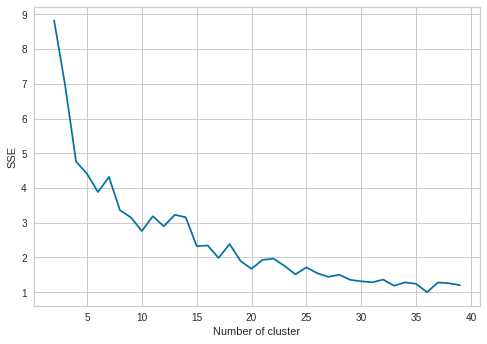

In [ ]:
elbowtest_custom(mmr_slected_features,40,0.1,show_step=False)

#### Elbow Test On pca_selected_features Using Custom K-Means
We can observe that within k = 8-10 range, the plot starts to flatten

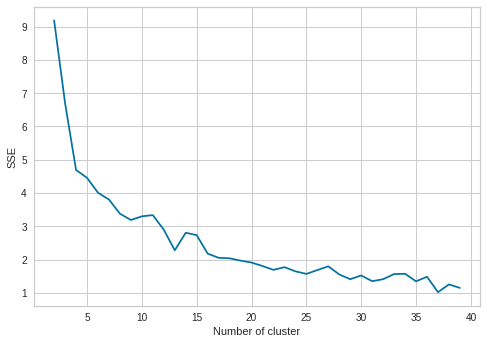

In [ ]:
elbowtest_custom(pca_selected_features,40,0.1,show_step=False)

#### Clustering
**<font color='red'>Based on the elbow test, we find out that The Estimated Number Of Distinct Tigers is $≈ 8$</font>**

In [ ]:
NUMBER_OF_CLUSTER = 8

In [ ]:
clustering = KMEANS_CUSTOM(n_clusters=NUMBER_OF_CLUSTER,alpha=0.1)
clustering.fit(mmr_slected_features)
cost,_,labels_hc = clustering.evaluate(mmr_slected_features)
print(TRUE_CLUSTER)
print(list(labels_hc))

[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 5, 5, 5, 6, 6, 6, 7, 7, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 7, 7, 5, 5, 5, 7, 7, 7, 7, 7, 7, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8]
[3, 7, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6]


#### Statistical Measure
We use Homogenity Score, Completeness And V-Measure Statistics to estimate how well the clusters are formed comapered to TRUE-LABEL

In [ ]:
print(f"Homogeneity: {metrics.homogeneity_score(TRUE_CLUSTER, labels_hc):.3f}")
print(f"Completeness: {metrics.completeness_score(TRUE_CLUSTER, labels_hc):.3f}")
print(f"V-measure: {metrics.v_measure_score(TRUE_CLUSTER, labels_hc):.3f}")

Homogeneity: 0.858
Completeness: 0.843
V-measure: 0.851


## **Unsupervised Sub Clustering Of Tigers**
We independently run DBSCAN clustering algorithm on the samples from each of the Geo-Graphical Cluster separately. DBSCAN algorithm does not need the number of clusters as input parameter. It takes min_sample(min number of paw-print in close proximity to form a valid cluster) and eps(The maximum distance between two samples for one to be considered as in the neighborhood of the other). 

**We chose eps = 0.9 and min_sample = 1 to find the upperbound of cluster numbers and min_sample = 5 to find the regular number of clusters.** 
>>Example: sub_cluster_id = 7\~1, this signifies 1$^{st}$ feature wise subcluster in 7$^{th}$ geographical cluster. 7\~noise are sub-clusters with noise (i.e. outliers) in  7$^{th}$ geographical cluster.

##### Utility Function To Run DBSCAN Algorithm in each geo-cluster. This returns number of subclusters in each geo-cluster, total number of subclusters and sub_cluster list. 

In [ ]:
def accumulate_number_of_subcluster_dbscan(num_reg_cluster, reg_ids,input,eps=float('inf'), min_samples=3):
  sub_freq_cluster_list = []
  all_cluster_list = reg_ids.astype(str)
  for id in range(num_reg_cluster):
    indx = np.where(reg_ids==id)
    A = input[indx]
    cluster_db = sklearn.cluster.DBSCAN(eps=eps, min_samples=min_samples).fit(A)
    labels_db = cluster_db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_db = max(1,len(set(labels_db)) - (1 if -1 in labels_db else 0))
    n_noise_db = list(labels_db).count(-1)
    j = 0
    for i in indx[0]:
      all_cluster_list[i] = all_cluster_list[i]+'~'+str("noise" if labels_db[j]==-1 else labels_db[j])
      j+=1
    # print("Estimated number of clusters: %d" % n_clusters_db)
    # print("Estimated number of noise points: %d" % n_noise_db)
    sub_freq_cluster_list.append(n_clusters_db)
  return sub_freq_cluster_list, np.sum(sub_freq_cluster_list), all_cluster_list

##### **Subclustering Based On Feature selected with mRMR algorithm**

###### *min_samples = 5*

In [ ]:
sub_freq_cluster_list,n_sub_cluster,all_sub_cluster_list = accumulate_number_of_subcluster_dbscan(NUM_REGION_CLUSTER, reg_labels_kmean, location_eleminated_mmr_slected_features,eps=0.9, min_samples=5)

print(" number of subclusters in each geo-cluster: ",sub_freq_cluster_list)
print(" total number of subclusters: ",n_sub_cluster)
print(" sub_cluster list: ",all_sub_cluster_list)

mrmr_n_sub_cluster = n_sub_cluster
mrmr_all_sub_cluster_list = all_sub_cluster_list

 number of subclusters in each geo-cluster:  [1, 1, 1, 1, 1, 1, 1, 1]
 total number of subclusters:  8
 sub_cluster list:  ['2~0' '2~0' '2~0' '2~0' '2~0' '7~0' '7~0' '7~0' '7~0' '0~noise' '0~noise'
 '0~noise' '1~0' '1~0' '1~0' '6~0' '6~0' '6~0' '6~0' '6~0' '5~0' '5~0'
 '5~0' '5~0' '5~0' '1~0' '1~0' '1~0' '1~0' '1~0' '3~0' '3~0' '3~0' '3~0'
 '3~0' '3~0' '3~0' '7~0' '7~noise' '1~0' '1~0' '1~0' '4~0' '4~0' '4~0'
 '4~0' '4~0' '4~0' '1~0' '1~0' '1~0' '4~0' '4~0' '4~0' '4~0' '4~0' '4~0'
 '4~0' '4~0' '4~0' '4~0' '5~0' '5~0' '5~0']


##### *min_samples=1 (to get the upperbound)*

In [ ]:
sub_freq_cluster_list,n_sub_cluster,all_sub_cluster_list = accumulate_number_of_subcluster_dbscan(NUM_REGION_CLUSTER, reg_labels_kmean, location_eleminated_mmr_slected_features,eps=0.9, min_samples=1)

print(" upperbound of number of subclusters in each geo-cluster: ",sub_freq_cluster_list)
print(" upperbound of total number of subclusters: ",n_sub_cluster)

mrmr_upper_num_cluster = n_sub_cluster
mrmr_upper_labels_hc = all_sub_cluster_list

 upperbound of number of subclusters in each geo-cluster:  [1, 1, 1, 1, 1, 1, 1, 1]
 upperbound of total number of subclusters:  8


##### **Subclustering Based On Feature selected with PCA algorithm**

###### *min_samples = 5*

In [ ]:
sub_freq_cluster_list,n_sub_cluster,all_sub_cluster_list = accumulate_number_of_subcluster_dbscan(NUM_REGION_CLUSTER, reg_labels_kmean, location_eleminated_pca_selected_features,eps=0.9, min_samples=5)

print(" number of subclusters in each geo-cluster: ",sub_freq_cluster_list)
print(" total number of subclusters: ",n_sub_cluster)
print(" sub_cluster list: ",all_sub_cluster_list)

pca_upper_num_cluster = n_sub_cluster
pca_upper_labels_hc = all_sub_cluster_list

 number of subclusters in each geo-cluster:  [1, 1, 1, 1, 1, 1, 1, 1]
 total number of subclusters:  8
 sub_cluster list:  ['2~0' '2~0' '2~0' '2~0' '2~0' '7~0' '7~0' '7~0' '7~0' '0~noise' '0~noise'
 '0~noise' '1~0' '1~0' '1~0' '6~0' '6~0' '6~0' '6~0' '6~0' '5~0' '5~0'
 '5~0' '5~0' '5~0' '1~0' '1~0' '1~0' '1~0' '1~0' '3~0' '3~0' '3~0' '3~0'
 '3~0' '3~0' '3~0' '7~0' '7~noise' '1~0' '1~0' '1~0' '4~0' '4~0' '4~0'
 '4~0' '4~0' '4~0' '1~0' '1~0' '1~0' '4~0' '4~0' '4~0' '4~0' '4~0' '4~0'
 '4~0' '4~0' '4~0' '4~0' '5~0' '5~0' '5~0']


##### *min_samples=1 (to get the upperbound)*

In [ ]:
sub_freq_cluster_list,n_sub_cluster,all_sub_cluster_list = accumulate_number_of_subcluster_dbscan(NUM_REGION_CLUSTER, reg_labels_kmean, location_eleminated_pca_selected_features,eps=0.9, min_samples=1)

print(" upperbound of number of subclusters in each geo-cluster: ",sub_freq_cluster_list)
print(" upperbound of total number of subclusters: ",n_sub_cluster)

pca_upper_num_cluster = n_sub_cluster
pca_upper_labels_hc = all_sub_cluster_list

 upperbound of number of subclusters in each geo-cluster:  [1, 1, 1, 1, 1, 1, 1, 1]
 upperbound of total number of subclusters:  8


###**<font color='red'>Based on the Sub-clustering method, we find out that The Estimated Number Of Distinct Tigers is $≈ 8$ in the training dataset, using both PCA and mRMR selected features, for eps = 0.9 and min_sample = 5, where 3 samples are classified as outliers. Additionally, we found that upper bound of Number Of Distinct Tigers is 8 using min_sample=1. </font>**
### *This holds good with the information provided in Data_Description.pdf (page 15)*

## **Visualizing Train Data [Plotting The training samples at respective Geographical Position using different colors for different group id]**

### Based on the result acheived from Custom K-Means approach using mRMR selected features.

In [ ]:
fig = px.scatter_mapbox(df[['Lat', 'Long']],
                        lat="Lat", 
                        lon="Long",
                        color = labels_hc,
                        zoom=10, 
                        height=500,
                        width=500,title="Tiger Category")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Based on the result acheived from sub-clustering method approach using mRMR selected features.

In [ ]:
fig = px.scatter_mapbox(df[['Lat', 'Long']],
                        lat="Lat", 
                        lon="Long",
                        color = mrmr_all_sub_cluster_list,
                        zoom=10, 
                        height=500,
                        width=500,title="Tiger Category[Upper Bound]")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# **On Census.csv [Test Data]**

### Feature Grouping
We grouped the feature vectors in test data (Census.csv) according to the same strategy we followed for train data

In [ ]:
census_feature_group0_ = census_all_data[:,0:20].astype(np.float32)      # log(AB). -> log(area(OBC))
census_feature_group1_ = census_all_data[:,20:30].astype(np.float32)     #log(area(toe4)) -> log(maj_o * min_o)
census_feature_group2 = census_all_data[:,30:34].astype(np.float32)     # log(maj_a / min_a) -> log(maj_d / min_d)
census_feature_3 = census_all_data[:,34:35].astype(np.float32)     # log(maj_o / min_o)
census_feature_4 = census_all_data[:,35:36].astype(np.float32)    # bounding area

census_feature_group0 = np.concatenate((census_feature_group0_,census_feature_4),axis=1)  # merged bounding area + feature_group1
census_feature_group1 = np.concatenate((census_feature_group1_,census_feature_4),axis=1)  # merged bounding area + feature_group2

census_feature_5 = census_all_data[:,36:37].astype(np.float32)     # bounding ratio

census_feature_6 = census_all_data[:,37:38].astype(np.float32)  
census_feature_7 = census_all_data[:,38:39].astype(np.float32)  

In [ ]:
census_raw_features = np.hstack((census_feature_group0_,
                          census_feature_group1_,
                          census_feature_group2,
                          census_feature_3,
                          census_feature_4,
                          census_feature_5,
                          census_feature_6,
                          census_feature_7))

### mRMR ranking
We selected the features according to the mRMR ranking achieved while evaluated on train data

In [ ]:
census_df.columns[location_eleminated_mmr_ranking]

Index(['log(maj_o * min_o)', 'bounding ratio', 'log(maj_b / min_b)',
       'log(area(Pad))', 'log(area(toe3))', 'log(area(BCD))',
       'log(maj_b * min_b)', 'log(area(toe1))', 'log(area(ABC))',
       'log(maj_d * min_d)'],
      dtype='object')

In [ ]:
census_location_eleminated_mmr_slected_features = census_raw_features[:,location_eleminated_mmr_ranking]
census_mmr_slected_features = np.hstack((census_raw_features[:,37:],census_location_eleminated_mmr_slected_features))

In [ ]:
census_mmr_slected_features[0]

array([ 8.8797241e+01,  2.2098532e+01,  6.0250080e-01, -7.3359072e-02,
        8.9705884e-01,  7.1442544e-01,  6.3961923e-01,  5.2541667e-01,
        2.5700936e-01,  5.2285713e-01,  4.5831570e-01,  1.1178248e-01],
      dtype=float32)

### PCA Reduction

In [ ]:
census_kpca = KernelPCA(n_components = 4, kernel='rbf')
census_principle_cluster0 = census_kpca.fit_transform(census_feature_group0).astype(np.float32)

census_kpca = KernelPCA(n_components = 2, kernel='rbf')
census_principle_cluster1 = census_kpca.fit_transform(census_feature_group1).astype(np.float32)


location_eleminated_pca_census_selected_features = np.hstack((census_principle_cluster0,census_principle_cluster1,census_feature_group2,census_feature_3,census_feature_5))
pca_census_selected_features = np.hstack((census_raw_features[:,37:],location_eleminated_pca_census_selected_features))

In [ ]:
pca_census_selected_features[0]

array([ 8.8797241e+01,  2.2098532e+01,  2.8892983e-02, -3.7462801e-02,
       -8.2110083e-03, -1.4382539e-02,  2.2620256e-01, -2.5459430e-01,
        6.5857607e-01,  8.9705884e-01,  6.2738854e-01,  5.8573598e-01,
        7.6516634e-01, -7.3359072e-02], dtype=float32)

## Elbow Test On Census Using Custom K-Means With *mrmr_selected_features*

*   We can see that elbow test is inconclusive. 

*   We can observe that after k ≈ 25, the plot starts to flatten.




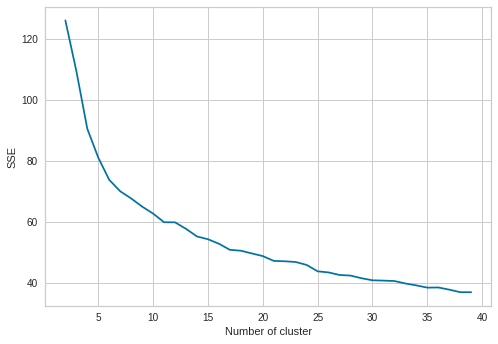

In [ ]:
elbowtest_custom(census_mmr_slected_features,40,0.2)

## **Unsupervised Sub-Clustering On Census**
As we could not draw any conclusion from the Elbow test above, we have to rely upon subclustering technique for better results. Following the Geo-Graphical clustering formed in the previous section, we can get the upperbound of number of distinct tiger using min_samples = 1 and a regular number of distinct tiger using min_samples = 5.

#### From mRMR
Subclustering Based On Feature selected with mRMR algorithm.

##### min_samples = 5

In [ ]:
census_min_foot_steps_for_closure = 5
census_sub_freq_cluster_list,census_n_sub_cluster,census_all_sub_cluster_list = accumulate_number_of_subcluster_dbscan(CENSUS_NUM_REGION_CLUSTER, census_reg_labels_kmean, census_location_eleminated_mmr_slected_features,eps=0.9, min_samples=census_min_foot_steps_for_closure)


print(" number of subclusters in each geo-cluster: ",census_sub_freq_cluster_list)
print(" total number of subclusters: ",census_n_sub_cluster)
print(" sub_cluster list: ",census_all_sub_cluster_list)
print(" Number of noise: ",(len(set(census_all_sub_cluster_list))-census_n_sub_cluster))

mrmr_census_n_sub_cluster = census_n_sub_cluster
mrmr_census_all_sub_cluster_list = census_all_sub_cluster_list

 number of subclusters in each geo-cluster:  [1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2]
 total number of subclusters:  27
 sub_cluster list:  ['5~0' '5~0' '5~1' ... '15~0' '15~0' '15~0']
 Number of noise:  13


##### min_samples = 1(to get upper bound)

In [ ]:
census_min_foot_steps_for_closure = 1
census_sub_freq_cluster_list,census_n_sub_cluster,census_all_sub_cluster_list = accumulate_number_of_subcluster_dbscan(CENSUS_NUM_REGION_CLUSTER, census_reg_labels_kmean, census_location_eleminated_mmr_slected_features,eps=0.9, min_samples=census_min_foot_steps_for_closure)


print(" number of subclusters in each geo-cluster: ",census_sub_freq_cluster_list)
print(" total number of subclusters: ",census_n_sub_cluster)
print(" sub_cluster list: ",census_all_sub_cluster_list)
print(" Number of noise: ",(len(set(census_all_sub_cluster_list))-census_n_sub_cluster))

mrmr_census_upper_n_sub_cluster = census_n_sub_cluster
mrmr_census_all_upper_sub_cluster_list = census_all_sub_cluster_list

 number of subclusters in each geo-cluster:  [2, 3, 2, 2, 3, 2, 2, 2, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2]
 total number of subclusters:  40
 sub_cluster list:  ['5~0' '5~0' '5~1' ... '15~0' '15~0' '15~0']
 Number of noise:  0


#### From PCA
Subclustering Based On Feature selected with PCA algorithm

##### min_samples = 5

In [ ]:
census_min_foot_steps_for_closure = 5
census_sub_freq_cluster_list,census_n_sub_cluster,census_all_sub_cluster_list = accumulate_number_of_subcluster_dbscan(CENSUS_NUM_REGION_CLUSTER, census_reg_labels_kmean, location_eleminated_pca_census_selected_features,eps=0.9, min_samples=census_min_foot_steps_for_closure)


print(" number of subclusters in each geo-cluster: ",census_sub_freq_cluster_list)
print(" total number of subclusters: ",census_n_sub_cluster)
print(" sub_cluster list: ",census_all_sub_cluster_list)
print(" Number of noise: ",(len(set(census_all_sub_cluster_list))-census_n_sub_cluster))

pca_census_n_sub_cluster = census_n_sub_cluster
pca_census_all_sub_cluster_list = census_all_sub_cluster_list

 number of subclusters in each geo-cluster:  [1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
 total number of subclusters:  24
 sub_cluster list:  ['5~0' '5~0' '5~0' ... '15~0' '15~0' '15~0']
 Number of noise:  10


##### min_samples = 1(to get upper bound)

In [ ]:
census_min_foot_steps_for_closure = 1
census_sub_freq_cluster_list,census_n_sub_cluster,census_all_sub_cluster_list = accumulate_number_of_subcluster_dbscan(CENSUS_NUM_REGION_CLUSTER, census_reg_labels_kmean, location_eleminated_pca_census_selected_features,eps=0.9, min_samples=census_min_foot_steps_for_closure)


print(" number of subclusters in each geo-cluster: ",census_sub_freq_cluster_list)
print(" total number of subclusters: ",census_n_sub_cluster)
print(" sub_cluster list: ",census_all_sub_cluster_list)
print(" Number of noise: ",(len(set(census_all_sub_cluster_list))-census_n_sub_cluster))

pca_census_upper_n_sub_cluster = census_n_sub_cluster
pca_census_all_upper_sub_cluster_list = census_all_sub_cluster_list

 number of subclusters in each geo-cluster:  [2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2]
 total number of subclusters:  33
 sub_cluster list:  ['5~0' '5~0' '5~0' ... '15~0' '15~0' '15~0']
 Number of noise:  0


###**<font color='red'>Based on the Sub-clustering method, we found that The Estimated Regular Number Of Distinct Tigers is $≈ 24 - 27$ , using eps = 0.9 and min_sample = 5, where 10-13 samples were classified as outliers among the total 1059 census samples. We also estimate the upperbound of number of Distinct Tigers to be within 33-40 based on the upper bound test.</font>**

## *Unsupervised Clustering On Census using Custom K-Means*
We ran our Custom K-Mean algorithm using number of cluster = 27

In [ ]:
CENSUS_NUMBER_OF_CLUSTER = 27

In [ ]:
census_clustering = KMEANS_CUSTOM(n_clusters=CENSUS_NUMBER_OF_CLUSTER,max_iter=300,alpha=0.2)
census_clustering.fit(census_mmr_slected_features)
census_cost,census_centroids, census_labels_hc = census_clustering.evaluate(census_mmr_slected_features)
print(list(census_labels_hc))

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 23, 2, 3, 2, 3, 3, 2, 23, 2, 2, 2, 2, 17, 2, 2, 2, 2, 17, 2, 2, 2, 17, 2, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 17, 24, 24, 24, 24, 24, 24, 24, 21, 3, 23, 24, 24, 24, 24, 24, 3, 23, 3, 3, 23, 3, 3, 17, 3, 17, 3, 3, 3, 3, 3, 17, 3, 3, 3, 3, 3, 3, 3, 3, 23, 3, 3, 17, 3, 23, 3, 17, 3, 2, 17, 2, 3, 3, 3, 17, 3, 16, 16, 2, 17, 17, 16, 23, 23, 17, 3, 3, 23, 3, 3, 3, 17, 23, 23, 16, 3, 17, 3, 3, 16, 16, 16, 16, 17, 16, 16, 16, 16, 16, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 24, 24, 24, 24, 23, 24, 24, 24, 24, 23, 24, 24, 24, 24, 23, 3, 24, 23, 3, 3, 3, 3, 3, 3, 3, 17, 16, 16, 16, 16, 24, 24, 17, 24, 24, 16, 16, 16, 24, 24, 24, 24, 5, 5, 4, 4, 4, 4, 17, 24, 17, 16, 16, 16, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 16, 16, 16, 16, 16, 16, 4, 4, 16, 16, 16, 22, 22, 22, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 4, 4, 16, 16, 22, 22, 22, 1, 22, 1, 22, 1, 22, 22, 2

## **Visualizing Test Data [Plotting the test samples at respective Geographical Position using different colors for different group ids]**

### Based on the result achieved from Custom K-Means approach using mRMR selected features.

In [ ]:
fig = px.scatter_mapbox(census_df[['Lat', 'Long']],
                        lat="Lat", 
                        lon="Long",
                        color = census_labels_hc,
                        zoom=10, 
                        height=800,
                        width=800,title="Tiger Category")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Based on the result achieved from Sub Clustering approach using mRMR selected features.

In [ ]:
fig = px.scatter_mapbox(census_df[['Lat', 'Long']],
                        lat="Lat", 
                        lon="Long",
                        color = mrmr_census_all_sub_cluster_list,
                        zoom=10, 
                        height=800,
                        width=800,title="Tiger Category[Upper Bound, mrmr]")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Based on the result achieved from Sub Clustering approach using PCA reduced features.

In [ ]:
fig = px.scatter_mapbox(census_df[['Lat', 'Long']],
                        lat="Lat", 
                        lon="Long",
                        color = pca_census_all_upper_sub_cluster_list,
                        zoom=10, 
                        height=800,
                        width=800,title="Tiger Category[Upper Bound , pca]")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()